In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing, model_selection, metrics
# Using plt to read each image and convert it into a numpy array
import matplotlib.pyplot as plt
import os
import math

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
base_training_path = '/kaggle/input/padhai-text-non-text-classification-level-1/level_1_train/level_1'

In [3]:
target = []

In [4]:
for folder in os.listdir(base_training_path):
    print(f'Processing: {folder}')
    sub_directory_path = os.path.join(base_training_path,folder)
    count = sum([1 for file in os.listdir(sub_directory_path)])
    target.append(np.zeros(count).astype(int) if folder == 'background' else np.ones(count).astype(int))

Processing: ta
Processing: background
Processing: hi
Processing: en


In [5]:
for index in range(len(target)-1):
    Y = np.concatenate((target[index],target[index+1])) if index==0 else np.concatenate((Y,target[index+1]))

In [6]:
X = []

In [7]:
for folder in os.listdir(base_training_path):
    subfolder = os.path.join(base_training_path,folder)
    print(folder)
    for file in os.listdir(subfolder):
        sample = plt.imread(os.path.join(subfolder,file))
        X.append(sample.flatten())

ta
background
hi
en


In [8]:
X = np.array(X)

In [9]:
X.shape

(892, 256)

In [10]:
scaler = preprocessing.StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled

array([[-0.05286458,  0.23878133,  0.19099838, ...,  0.23017785,
         0.20812839, -1.59905817],
       [ 0.20048778,  0.12892037,  0.2742176 , ..., -0.28397568,
         0.02888579, -0.57955748],
       [ 0.04214255,  0.23878133,  0.2742176 , ..., -0.00976046,
         0.20812839,  0.12625069],
       ...,
       [ 0.10548064,  0.23878133,  0.2742176 , ..., -0.14686807,
         0.20812839,  0.20467382],
       [-0.02119554,  0.23878133, -5.03100789, ..., -0.00976046,
         0.20812839, -1.20694252],
       [ 0.0738116 ,  0.23878133,  0.2742176 , ..., -0.07831427,
         0.11850709,  0.20467382]])

In [13]:
class Sigmoid_Neuron:
    def __init__(self,shape):
        self.b = np.random.rand()
        self.w = np.random.rand(shape)
        print('Weights and bias initialized for the model.')
    
    def model(self,X):
        return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
    
    def grad_w(self,X,Y,Y_pred):
        '''
        if Y==0:
            return X*Y_pred
        elif Y==1:
            return X*(Y_pred-1)
        else:
            raise ValueError("y should be 0 or 1")
        '''
        return (X*(Y_pred-Y))
    
    def grad_b(self,Y,Y_pred):
        '''
        if Y==0:
            return Y_pred
        elif Y==1:
            return (Y_pred-1)
        else:
            raise ValueError("y should be 0 or 1")
        '''
        return (Y_pred-Y)
        
    def plot_loss(self,loss_dict: dict):
        plt.figure(figsize=(15,6))
        plt.plot(loss_dict.keys(),loss_dict.values())
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        
    def fit(self,X: np.ndarray,Y: np.ndarray,epochs: int,learning_rate: float):
        dw, db = 0,0
        training_loss = dict()
        Y_pred_dict = dict()
        for epoch in range(epochs):
            Y_pred = []
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                dw += self.grad_w(x,y,y_pred)
                db += self.grad_b(y,y_pred)
                Y_pred.append(y_pred)
            
            loss = metrics.log_loss(Y,np.array(Y_pred))
            print(f'Training loss for epoch {epoch+1}: {loss}')
            training_loss[epoch+1] = loss
          
            self.w -= learning_rate*dw
            self.b -= learning_rate*db
            
        self.plot_loss(training_loss)
        
    def predict(self,X_test):
        Y_pred_test = self.model(X_test)
        return Y_pred_test

In [14]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_scaled,Y,test_size= 0.3,random_state = 42)

In [15]:
classifier_model = Sigmoid_Neuron(np.shape(X_train)[1])

Weights and bias initialized for the model.


Training loss for epoch 1: 31.61535181113102
Training loss for epoch 2: 1.9370991411883527
Training loss for epoch 3: 1.7706329681441169
Training loss for epoch 4: 1.7328679513998633
Training loss for epoch 5: 1.7328679513998633
Training loss for epoch 6: 1.675105686353201
Training loss for epoch 7: 1.6475473529578717
Training loss for epoch 8: 1.617343421306539
Training loss for epoch 9: 1.5822291962687516
Training loss for epoch 10: 1.38629436111991
Training loss for epoch 11: 1.3285320960732285
Training loss for epoch 12: 1.3285320960732285
Training loss for epoch 13: 1.2707698310265665
Training loss for epoch 14: 1.1552453009332424
Training loss for epoch 15: 1.0974830358865801
Training loss for epoch 16: 1.0974830358865801
Training loss for epoch 17: 1.0974830358865801
Training loss for epoch 18: 1.0397207708399183
Training loss for epoch 19: 1.0397207708399183
Training loss for epoch 20: 1.0397207708399183


/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8

Training loss for epoch 21: 1.0397207708399183
Training loss for epoch 22: 0.9819585057932559
Training loss for epoch 23: 0.8664339756999317
Training loss for epoch 24: 0.8664339756999317
Training loss for epoch 25: 0.8664339756999317
Training loss for epoch 26: 0.8664339756999317
Training loss for epoch 27: 0.8664339756999317
Training loss for epoch 28: 0.8664339756999317
Training loss for epoch 29: 0.8664339756999317
Training loss for epoch 30: 0.8086717106532697
Training loss for epoch 31: 0.7509094456066077
Training loss for epoch 32: 0.7509094456066077
Training loss for epoch 33: 0.7509094456066077
Training loss for epoch 34: 0.7491653269068429
Training loss for epoch 35: 0.6931471805599455
Training loss for epoch 36: 0.6931471805599455
Training loss for epoch 37: 0.6931471805599455
Training loss for epoch 38: 0.6931471805599455
Training loss for epoch 39: 0.6931471805599455
Training loss for epoch 40: 0.6931471805599455
Training loss for epoch 41: 0.6353849155132834


/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8

Training loss for epoch 42: 0.6826932998678507
Training loss for epoch 43: 0.6380013819598452
Training loss for epoch 44: 0.6353849155132832
Training loss for epoch 45: 0.6353849155132832
Training loss for epoch 46: 0.6353849155132832
Training loss for epoch 47: 0.6353849155132832
Training loss for epoch 48: 0.5977758758714095
Training loss for epoch 49: 0.5776226504666212
Training loss for epoch 50: 0.5776226504666212
Training loss for epoch 51: 0.5776226504666212
Training loss for epoch 52: 0.5776226504666212
Training loss for epoch 53: 0.5776226504666212
Training loss for epoch 54: 0.5776226504666212
Training loss for epoch 55: 0.5776226504666212
Training loss for epoch 56: 0.462098120373297
Training loss for epoch 57: 0.462098120373297
Training loss for epoch 58: 0.5198603854199592
Training loss for epoch 59: 0.5776226504666212
Training loss for epoch 60: 0.5776226504666212
Training loss for epoch 61: 0.5776226504666212


/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8

Training loss for epoch 62: 0.5776226504666212
Training loss for epoch 63: 0.5198603854199592
Training loss for epoch 64: 0.5198603854199592
Training loss for epoch 65: 0.5198603854199592
Training loss for epoch 66: 0.5198603854199592
Training loss for epoch 67: 0.5198603854199592
Training loss for epoch 68: 0.462098120373297
Training loss for epoch 69: 0.462098120373297
Training loss for epoch 70: 0.462098120373297
Training loss for epoch 71: 0.462098120373297
Training loss for epoch 72: 0.462098120373297
Training loss for epoch 73: 0.462098120373297
Training loss for epoch 74: 0.40433585532663496
Training loss for epoch 75: 0.40433585532663496
Training loss for epoch 76: 0.40433585532663496
Training loss for epoch 77: 0.40433585532663496
Training loss for epoch 78: 0.34657359027997287
Training loss for epoch 79: 0.2888113252333107
Training loss for epoch 80: 0.2888113252333107
Training loss for epoch 81: 0.2888113252333107


/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8

Training loss for epoch 82: 0.2888113252333107
Training loss for epoch 83: 0.2888113252333107
Training loss for epoch 84: 0.2888113252333107
Training loss for epoch 85: 0.2888113252333107
Training loss for epoch 86: 0.2888113252333107
Training loss for epoch 87: 0.2310490601866486
Training loss for epoch 88: 0.2310490601866486
Training loss for epoch 89: 0.2310490601866486
Training loss for epoch 90: 0.2310490601866486
Training loss for epoch 91: 0.2310490601866486
Training loss for epoch 92: 0.2310490601866486
Training loss for epoch 93: 0.17328679513998652
Training loss for epoch 94: 0.17328679513998652
Training loss for epoch 95: 0.11552453009332442
Training loss for epoch 96: 0.11552453009332442
Training loss for epoch 97: 0.11552453009332442
Training loss for epoch 98: 0.11552453009332442
Training loss for epoch 99: 0.11552453009332442
Training loss for epoch 100: 0.11552453009332442


/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))
/tmp/ipykernel_654/2995208537.py:8

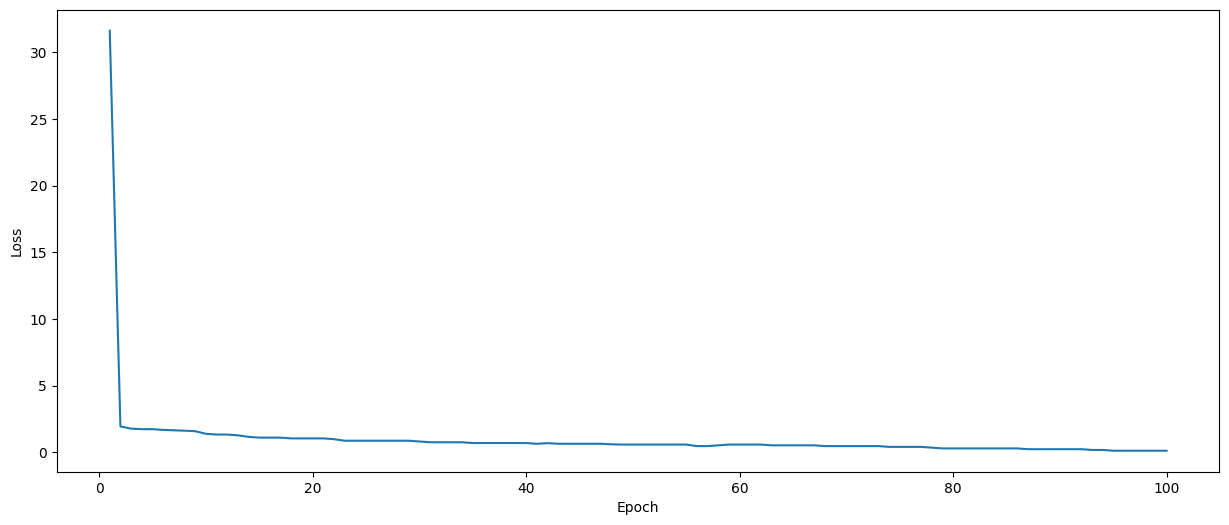

In [16]:
classifier_model.fit(X_train,Y_train,100,0.1)        

In [17]:
Y_pred_validation = classifier_model.predict(X_validation)

/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))


In [18]:
Y_pred_loss = metrics.log_loss(Y_validation,Y_pred_validation)

In [19]:
Y_pred_loss

1.0759299519139451

In [20]:
print(f"Accuracy of the model: {metrics.accuracy_score(Y_validation,Y_pred_validation)}")

Accuracy of the model: 0.9701492537313433


#### Making predictions on the test set

In [21]:
base_test_directory = '/kaggle/input/padhai-text-non-text-classification-level-1/level_1_test/kaggle_level_1'

In [39]:
X_test_values = []
X_test_ids = []

In [40]:
for image in os.listdir(base_test_directory):
    img = plt.imread(os.path.join(base_test_directory,image))
    X_test_ids.append(image.strip(".jpg"))
    X_test_values.append(img.flatten())

In [41]:
X_test_values = np.array(X_test_values)

In [42]:
X_test_values.shape

(297, 256)

In [43]:
X_test_values_scaled = scaler.transform(X_test_values)

In [46]:
X_test = dict(zip(X_test_ids,X_test_values_scaled))

In [52]:
Y_pred_test = dict()

In [53]:
for key in X_test.keys():
    image = X_test[key]
    Y_pred_test[key] = classifier_model.predict(image)

/tmp/ipykernel_654/2995208537.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-(np.dot(X,self.w.T)+self.b)))


In [59]:
Y_pred_test = pd.DataFrame(Y_pred_test.items(),columns=['ImageId','Class'])

In [61]:
Y_pred_test.to_csv('Abhijith_Submission_level1.csv')